# Implementación Algoritmo CYK

In [15]:
def algoritmoCYK(grammar, word):
    """
    Implementa el algoritmo CYK.

    Args:
        grammar: Gramática en forma normal de Chomsky (CNF), representada como un diccionario.
        word: La palabra que se quiere analizar.

    Returns:
        True si la palabra puede generarse a partir de la gramática, False si no.
    """

    n = len(word)
    non_terminals = list(grammar.keys())
    table = [[set() for _ in range(n)] for _ in range(n)]

    # Rellenar la tabla para las producciones de longitud 1 (diagonal)
    for i in range(n):
        for non_terminal, productions in grammar.items():
            for production in productions:
                if len(production) == 1 and production[0] == word[i]:
                    table[i][i].add(non_terminal)

    # Rellenar la tabla para las producciones de longitud > 1
    for length in range(2, n+1):
        for start in range(n-length+1):
            end = start + length - 1
            for split in range(start, end):
                for non_terminal, productions in grammar.items():
                    for production in productions:
                        if len(production) == 2:
                            left, right = production
                            if left in table[start][split] and right in table[split+1][end]:
                                table[start][end].add(non_terminal)

    # Verificar si el símbolo inicial está en la tabla
    return 'S' in table[0][n-1]


In [16]:
import time, random

def probar_complejidad(grammar, max_len):
    """
    Prueba la complejidad temporal del algoritmo CYK midiendo el tiempo de ejecución para distintas longitudes de palabra.

    Args:
        grammar: Gramática en forma normal de Chomsky (CNF).
        max_len: Longitud máxima de palabra a probar.

    Returns:
        Una lista de tiempos de ejecución para palabras de distintas longitudes.
    """
    tiempos = []

    for length in range(1, max_len + 1):
        word = ''.join(random.choice('ab') for _ in range(length))

        start_time = time.time()
        algoritmoCYK(grammar, word)
        end_time = time.time()

        tiempos.append((length, end_time - start_time))

    return tiempos


In [17]:
def demostrar_complejidad_O_n3(grammar, max_len):
    """
    Demuestra la complejidad O(n^3) contando las operaciones clave del algoritmo CYK.

    Args:
        grammar: Gramática en forma normal de Chomsky (CNF).
        max_len: Longitud máxima de palabra a probar.

    Returns:
        Una lista de pares (longitud, operaciones clave).
    """

    def algoritmoCYK_contando_operaciones(grammar, word):
        """
        Algoritmo CYK modificado para contar operaciones clave.

        Args:
            grammar: Gramática en CNF.
            word: La palabra a analizar.

        Returns:
            (resultado, operaciones): True si la palabra puede generarse, número de operaciones clave.
        """

        n = len(word)
        operaciones_clave = 0
        table = [[set() for _ in range(n)] for _ in range(n)]

        # Fase 1: Llenar la tabla para las producciones de longitud 1
        for i in range(n):
            for non_terminal, productions in grammar.items():
                for production in productions:
                    if len(production) == 1 and production[0] == word[i]:
                        table[i][i].add(non_terminal)
                        operaciones_clave += 1

        # Fase 2: Llenar la tabla para las producciones de longitud > 1
        for length in range(2, n+1):
            for start in range(n-length+1):
                end = start + length - 1
                for split in range(start, end):
                    for non_terminal, productions in grammar.items():
                        for production in productions:
                            if len(production) == 2:
                                left, right = production
                                if left in table[start][split] and right in table[split+1][end]:
                                    table[start][end].add(non_terminal)
                                    operaciones_clave += 1

        return 'S' in table[0][n-1], operaciones_clave

    # Probar para diferentes longitudes
    resultados = []
    for length in range(1, max_len + 1):
        word = ''.join(random.choice('ab') for _ in range(length))
        _, operaciones_clave = algoritmoCYK_contando_operaciones(grammar, word)
        resultados.append((length, operaciones_clave, length ** 3))

    return resultados


In [18]:
grammar = {
    'S': [['A', 'B'], ['B', 'C']],
    'A': [['B', 'A'], ['a']],
    'B': [['C', 'C'], ['b']],
    'C': [['A', 'B'], ['a']]
}


In [19]:
tiempos = probar_complejidad(grammar, max_len=20)
for longitud, tiempo in tiempos:
    print(f"Longitud: {longitud}, Tiempo de ejecución: {tiempo:.6f} segundos")

Longitud: 1, Tiempo de ejecución: 0.000028 segundos
Longitud: 2, Tiempo de ejecución: 0.000016 segundos
Longitud: 3, Tiempo de ejecución: 0.000024 segundos
Longitud: 4, Tiempo de ejecución: 0.000044 segundos
Longitud: 5, Tiempo de ejecución: 0.000097 segundos
Longitud: 6, Tiempo de ejecución: 0.000116 segundos
Longitud: 7, Tiempo de ejecución: 0.000186 segundos
Longitud: 8, Tiempo de ejecución: 0.000278 segundos
Longitud: 9, Tiempo de ejecución: 0.011265 segundos
Longitud: 10, Tiempo de ejecución: 0.000577 segundos
Longitud: 11, Tiempo de ejecución: 0.000618 segundos
Longitud: 12, Tiempo de ejecución: 0.000966 segundos
Longitud: 13, Tiempo de ejecución: 0.007271 segundos
Longitud: 14, Tiempo de ejecución: 0.001442 segundos
Longitud: 15, Tiempo de ejecución: 0.010099 segundos
Longitud: 16, Tiempo de ejecución: 0.005458 segundos
Longitud: 17, Tiempo de ejecución: 0.002455 segundos
Longitud: 18, Tiempo de ejecución: 0.010284 segundos
Longitud: 19, Tiempo de ejecución: 0.006329 segundos
Lo

In [20]:
resultados = demostrar_complejidad_O_n3(grammar, max_len=20)
for longitud, operaciones, esperado in resultados:
    print(f"Longitud: {longitud}, Operaciones clave: {operaciones}, O(n^3) esperado: {esperado}")

Longitud: 1, Operaciones clave: 1, O(n^3) esperado: 1
Longitud: 2, Operaciones clave: 5, O(n^3) esperado: 8
Longitud: 3, Operaciones clave: 11, O(n^3) esperado: 27
Longitud: 4, Operaciones clave: 12, O(n^3) esperado: 64
Longitud: 5, Operaciones clave: 13, O(n^3) esperado: 125
Longitud: 6, Operaciones clave: 20, O(n^3) esperado: 216
Longitud: 7, Operaciones clave: 37, O(n^3) esperado: 343
Longitud: 8, Operaciones clave: 31, O(n^3) esperado: 512
Longitud: 9, Operaciones clave: 74, O(n^3) esperado: 729
Longitud: 10, Operaciones clave: 82, O(n^3) esperado: 1000
Longitud: 11, Operaciones clave: 106, O(n^3) esperado: 1331
Longitud: 12, Operaciones clave: 98, O(n^3) esperado: 1728
Longitud: 13, Operaciones clave: 113, O(n^3) esperado: 2197
Longitud: 14, Operaciones clave: 390, O(n^3) esperado: 2744
Longitud: 15, Operaciones clave: 167, O(n^3) esperado: 3375
Longitud: 16, Operaciones clave: 380, O(n^3) esperado: 4096
Longitud: 17, Operaciones clave: 449, O(n^3) esperado: 4913
Longitud: 18, Ope

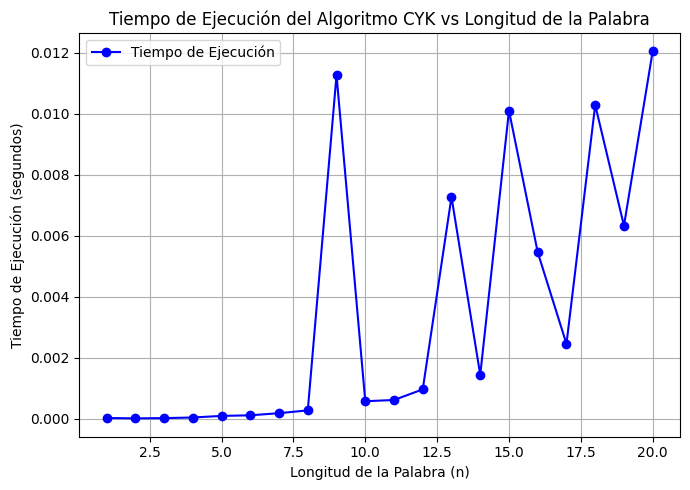

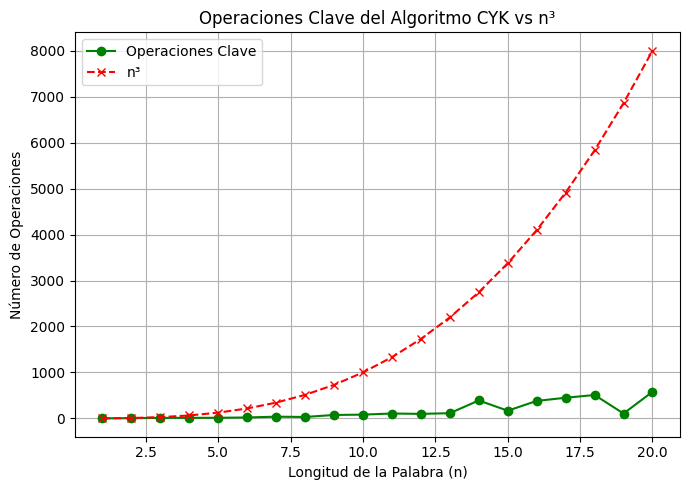

In [21]:
import matplotlib.pyplot as plt

def graficar_resultados(tiempos, resultados):
    """
    Genera gráficos para visualizar el tiempo de ejecución y las operaciones clave del algoritmo CYK.

    Args:
        tiempos: Lista de tuplas (longitud, tiempo de ejecución).
        resultados: Lista de tuplas (longitud, operaciones clave, n^3).
    """

    # Extraer datos para el tiempo de ejecución
    longitudes_tiempo = [item[0] for item in tiempos]
    tiempos_ejecucion = [item[1] for item in tiempos]

    # Extraer datos para operaciones clave y n^3
    longitudes_op = [item[0] for item in resultados]
    operaciones_clave = [item[1] for item in resultados]
    n_cubo = [item[2] for item in resultados]

    # --- Gráfico 1: Tiempo de Ejecución vs Longitud de la Palabra ---
    plt.figure(figsize=(7, 5))
    plt.plot(longitudes_tiempo, tiempos_ejecucion, marker='o', color='blue', label='Tiempo de Ejecución')
    plt.title('Tiempo de Ejecución del Algoritmo CYK vs Longitud de la Palabra')
    plt.xlabel('Longitud de la Palabra (n)')
    plt.ylabel('Tiempo de Ejecución (segundos)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Gráfico 2: Operaciones Clave vs n³ ---
    plt.figure(figsize=(7, 5))
    plt.plot(longitudes_op, operaciones_clave, marker='o', color='green', label='Operaciones Clave')
    plt.plot(longitudes_op, n_cubo, marker='x', color='red', linestyle='--', label='n³')
    plt.title('Operaciones Clave del Algoritmo CYK vs n³')
    plt.xlabel('Longitud de la Palabra (n)')
    plt.ylabel('Número de Operaciones')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

graficar_resultados(tiempos, resultados)
